In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns

import folium
from folium.plugins import HeatMap

In [2]:
# movie_file = "Resources/movie_scores.csv"
cali_fire = "Resources/California_Fire_Incidents.csv"

cali_fire_df = pd.read_csv(cali_fire)
cali_fire_df.head(10)

AcresBurned  Active                                          AdminUnit  \
0     257314.0   False  Stanislaus National Forest/Yosemite National Park   
1      30274.0   False  USFS Angeles National Forest/Los Angeles Count...   
2      27531.0   False  CAL FIRE Riverside Unit / San Bernardino Natio...   
3      27440.0   False                              Tahoe National Forest   
4      24251.0   False                       Ventura County Fire/CAL FIRE   
5      22992.0   False                             Sierra National Forest   
6      20292.0   False  CAL FIRE Riverside Unit / San Bernardino Natio...   
7      14754.0   False                            Klamath National Forest   
8      12503.0   False                         Six Rivers National Forest   
9      11429.0   False                         CAL FIRE Tehama-Glenn Unit   

   AirTankers  ArchiveYear  CalFireIncident  \
0         NaN         2013             True   
1         NaN         2013             True   
2         NaN         2013             True   
3         NaN         2013            False   
4         NaN         2013             True   
5         NaN         2013            False   
6         NaN         2013             True   
7         NaN         2013            False   
8         NaN         2013            False   
9         NaN         2013             True   

                                 CanonicalUrl  \
0              /incidents/2013/8/17/rim-fire/   
1       /incidents/2013/5/30/powerhouse-fire/   
2         /incidents/2013/7/15/mountain-fire/   
3         /incidents/2013/8/10/american-fire/   
4           /incidents/2013/5/2/springs-fire/   
5            /incidents/2013/7/22/aspen-fire/   
6            /incidents/2013/8/7/silver-fire/   
7  /incidents/2013/7/31/salmon-river-complex/   
8        /incidents/2013/8/10/corral-complex/   
9             /incidents/2013/8/23/deer-fire/   

                                  ConditionStatement  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  Acreage has been reduced based upon more accur...   
5                                                NaN   
6  Firefighters closed the containment lines toda...   
7                                                NaN   
8                                                NaN   
9  Fire suppression repair will continue througho...   

                                    ControlStatement     Counties  ...  \
0                                                NaN     Tuolumne  ...   
1                                                NaN  Los Angeles  ...   
2                                                NaN    Riverside  ...   
3                                                NaN       Placer  ...   
4                                                NaN      Ventura  ...   
5                                                NaN       Fresno  ...   
6  Hwy 243 remains closed between Twin Pines Road...    Riverside  ...   
7                                                NaN     Siskiyou  ...   
8                                                NaN     Humboldt  ...   
9                                                NaN       Tehama  ...   

   Started     Time.1     Status  StructuresDamaged StructuresDestroyed  \
0  8/17/13  15:25:00Z  Finalized                NaN                 NaN   
1  5/30/13  15:28:00Z  Finalized                NaN                 NaN   
2  7/15/13  13:43:00Z  Finalized                NaN                 NaN   
3  8/10/13  16:30:00Z  Finalized                NaN                 NaN   
4   5/2/13  07:01:00Z  Finalized                6.0                10.0   
5  7/22/13  22:15:00Z  Finalized                NaN                 NaN   
6   8/7/13  14:05:00Z  Finalized                8.0                40.0   
7  7/31/13  22:00:00Z  Finalized                NaN              

In [3]:
#columns = "Active", "CanonicalUrl", "ConditionStatement", "ControlStatement", "Time.1", "Status"
pyre_df = cali_fire_df.drop(columns=["Active", "StructuresEvacuated", "ConditionStatement", "FuelType", "Location", "ControlStatement", "CalFireIncident", "AdminUnit", "PercentContained", "Time.1", "Time", "Status", "SearchDescription", "SearchKeywords", "Public", "Updated"])
pyre_df.head()

# major_pyre = pyre_df.loc[pyre_df['AcresBurned']>=10]
# "CanonicalUrl",

AcresBurned  AirTankers  ArchiveYear  \
0     257314.0         NaN         2013   
1      30274.0         NaN         2013   
2      27531.0         NaN         2013   
3      27440.0         NaN         2013   
4      24251.0         NaN         2013   

                            CanonicalUrl     Counties CountyIds  \
0         /incidents/2013/8/17/rim-fire/     Tuolumne        55   
1  /incidents/2013/5/30/powerhouse-fire/  Los Angeles        19   
2    /incidents/2013/7/15/mountain-fire/    Riverside        33   
3    /incidents/2013/8/10/american-fire/       Placer        31   
4      /incidents/2013/5/2/springs-fire/      Ventura        56   

   CrewsInvolved  Dozers  Engines Extinguished  ...   Longitude  \
0            NaN     NaN      NaN       9/6/13  ... -120.086000   
1            NaN     NaN      NaN       6/8/13  ... -118.423176   
2            NaN     NaN      NaN      7/30/13  ... -116.728850   
3            NaN     NaN      NaN      8/30/13  ... -120.650000   
4           47.0     8.0    117.0      5/11/13  ...    0.000000   

   MajorIncident             Name  PersonnelInvolved  Started  \
0          False         Rim Fire                NaN  8/17/13   
1          False  Powerhouse Fire                NaN  5/30/13   
2          False    Mountain Fire                NaN  7/15/13   
3          False    American Fire                NaN  8/10/13   
4           True     Springs Fire             2167.0   5/2/13   

   StructuresDamaged  StructuresDestroyed  StructuresThreatened  \
0                NaN                  NaN                   NaN   
1                NaN                  NaN                   NaN   
2                NaN                  NaN                   NaN   
3                NaN                  NaN                   NaN   
4                6.0                 10.0                   NaN   

                               UniqueId WaterTenders  
0  5fb18d4d-213f-4d83-a179-daaf11939e78          NaN  
1  bf37805e-1cc2-4208-9972-753e47874c87          NaN  
2  a3149fec-4d48-427c-8b2c-59e8b79d59db          NaN  
3  8213f5c7-34fa-403b-a4bc-da2ace6e6625          NaN  
4  46731fb8-3350-4920-bdf7-910ac0eb715c         11.0  

[5 rows x 27 columns]

In [ ]:
# Percentage of each resource involved (pie chart for all resources data)

In [26]:
# pyre_df = pyre_df.groupby(by="MajorIncident")                                  
# pyre_df.head()

# major = pyre_df.loc[pyre_df["MajorIncident"]==True]
major_df = pyre_df.loc[pyre_df['AcresBurned']>=10]
major_df.head()

#major["MajorIncident"].count()

AcresBurned  AirTankers  ArchiveYear  \
0     257314.0         NaN         2013   
1      30274.0         NaN         2013   
2      27531.0         NaN         2013   
3      27440.0         NaN         2013   
4      24251.0         NaN         2013   

                            CanonicalUrl     Counties CountyIds  \
0         /incidents/2013/8/17/rim-fire/     Tuolumne        55   
1  /incidents/2013/5/30/powerhouse-fire/  Los Angeles        19   
2    /incidents/2013/7/15/mountain-fire/    Riverside        33   
3    /incidents/2013/8/10/american-fire/       Placer        31   
4      /incidents/2013/5/2/springs-fire/      Ventura        56   

   CrewsInvolved  Dozers  Engines Extinguished  ...   Longitude  \
0            NaN     NaN      NaN       9/6/13  ... -120.086000   
1            NaN     NaN      NaN       6/8/13  ... -118.423176   
2            NaN     NaN      NaN      7/30/13  ... -116.728850   
3            NaN     NaN      NaN      8/30/13  ... -120.650000   
4           47.0     8.0    117.0      5/11/13  ...    0.000000   

   MajorIncident             Name  PersonnelInvolved  Started  \
0          False         Rim Fire                NaN  8/17/13   
1          False  Powerhouse Fire                NaN  5/30/13   
2          False    Mountain Fire                NaN  7/15/13   
3          False    American Fire                NaN  8/10/13   
4           True     Springs Fire             2167.0   5/2/13   

   StructuresDamaged  StructuresDestroyed  StructuresThreatened  \
0                NaN                  NaN                   NaN   
1                NaN                  NaN                   NaN   
2                NaN                  NaN                   NaN   
3                NaN                  NaN                   NaN   
4                6.0                 10.0                   NaN   

                               UniqueId WaterTenders  
0  5fb18d4d-213f-4d83-a179-daaf11939e78          NaN  
1  bf37805e-1cc2-4208-9972-753e47874c87          NaN  
2  a3149fec-4d48-427c-8b2c-59e8b79d59db          NaN  
3  8213f5c7-34fa-403b-a4bc-da2ace6e6625          NaN  
4  46731fb8-3350-4920-bdf7-910ac0eb715c         11.0  

[5 rows x 27 columns]

In [25]:
major_df.count()

AcresBurned             1602
AirTankers                28
ArchiveYear             1602
CanonicalUrl            1602
Counties                1602
CountyIds               1602
CrewsInvolved            171
Dozers                   123
Engines                  191
Extinguished            1546
Days Burned             1602
Fatalities                21
Featured                1602
Final                   1602
Helicopters               84
Injuries                 120
Latitude                1602
Longitude               1602
MajorIncident           1602
Name                    1602
PersonnelInvolved        203
Started                 1602
StructuresDamaged         67
StructuresDestroyed      175
StructuresThreatened      30
UniqueId                1602
WaterTenders             146
dtype: int64

In [6]:
# pyre_df = pyre_df.set_index('Name')
# pyre_df.head()

<function matplotlib.pyplot.show(*args, **kw)>

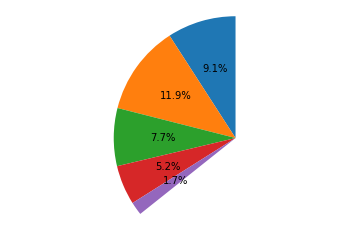

In [23]:
# gender_df = gender["Mouse ID"].count()
# gender_df
# plotdata = gender_df.plot.pie(figsize=(5,5), autopct="%1.1f%%")
wt_usage_df = major['WaterTenders'].count()/major.count()
wt_usage_df
#(above is in comparison to everything else)

wt_usage = major['WaterTenders'].count()/major["MajorIncident"].count()
wt_usage
engines_usage = major['Engines'].count()/major["MajorIncident"].count()
engines_usage
dozers_usage = major['Dozers'].count()/major["MajorIncident"].count()
dozers_usage
helicopters_usage = major['Helicopters'].count()/major["MajorIncident"].count()
helicopters_usage
air_tankers_usage = major['AirTankers'].count()/major["MajorIncident"].count()
air_tankers_usage
crews_usage = major['CrewsInvolved'].count()/major["MajorIncident"].count()
crews_usage

plt.pie((wt_usage, engines_usage, dozers_usage, helicopters_usage, air_tankers_usage,), autopct="%1.1f%%", startangle=90)
# plt.title("Sex")
plt.axis("equal")
plt.show
# labels=labels
# wt_pie_df = wt_usage_df.plot.pie(figsize=(5,5), autopct="%1.1f%%")

<function matplotlib.pyplot.show(*args, **kw)>

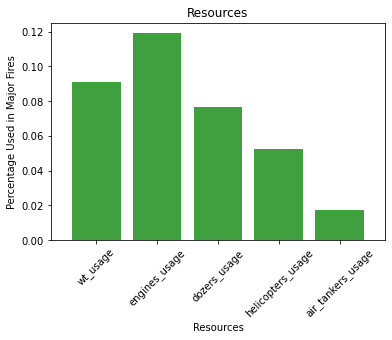

In [24]:
#plt.bar((wt_usage, engines_usage, dozers_usage, helicopters_usage, air_tankers_usage)

x_axis = np.arange(0, len((wt_usage, engines_usage, dozers_usage, helicopters_usage, air_tankers_usage)),1)
y_axis = (wt_usage, engines_usage, dozers_usage, helicopters_usage, air_tankers_usage)

plt.title("Resources")
plt.xlabel("Resources")
plt.ylabel("Percentage Used in Major Fires")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['wt_usage', 'engines_usage', 'dozers_usage', 'helicopters_usage', 'air_tankers_usage'], rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)

plt.bar(x_axis, y_axis, color='green', align='center', alpha=.75)
plt.show

In [9]:
# s = pd.Series(data=[("Engines"), ("Dozers"), ("Helicopters")],
#  index = ['Engines', 'Dozers', 'Helicopters'])
# ax = s.plot.pie(autopct='%.1f') 

In [82]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [34]:
# data=pyre_df_select[['Latitude', 'Longitude']]

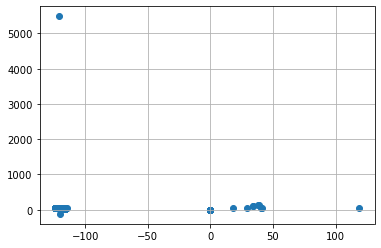

In [27]:
# check coordinates; there are quite a few unrealistic ones
plt.scatter(major_df.Longitude, major_df.Latitude)
plt.grid()
plt.show()

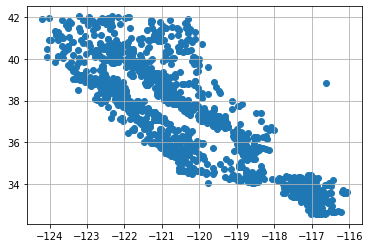

In [30]:
# remove those rows having unrealistic coordinates
major_df_select =major_df[major_df.Longitude<-115]
major_df_select = major_df_select[(major_df_select.Latitude<44) & (major_df_select.Latitude > 30)]
plt.scatter(major_df_select.Longitude, major_df_select.Latitude)
plt.grid()
plt.show()

In [29]:
# ok still one outlier in Nevada, let's get rid of that too
outlier = major_df_select[major_df_select.CanonicalUrl=='/incidents/2013/8/6/tram-fire/']

In [31]:
print('Outlier Lon/Lat:', outlier.Longitude, outlier.Latitude)

Outlier Lon/Lat: 113   -116.61
Name: Longitude, dtype: float64 113    38.838
Name: Latitude, dtype: float64


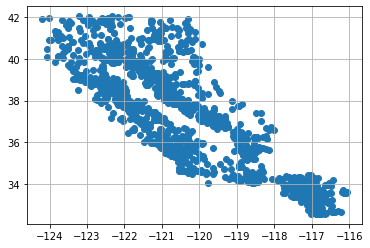

In [33]:
major_df_select = major_df_select[major_df_select.CanonicalUrl!='/incidents/2013/8/6/tram-fire/']
plt.scatter(major_df_select.Longitude, major_df_select.Latitude)
plt.grid()
plt.show()

In [43]:
import folium
# from folium.plugins import Choropleth
#my_USA_map = '../data/us-states.json'

# API = kaggle kernels pull docxian/wildfires-geospatial-visualization-and-eda

#my_map_1 = folium.Map(location=[36,-120], zoom_start=zoom_factor)


zoom_factor = 5 # inital map size
radius_scaling = 50 # scaling of bubbles

my_map_1 = folium.Map(location=[36,-120], zoom_start=zoom_factor)
#pyre_df.shape
for i in range(0,major_df_select.shape[0]):
   folium.Circle(
      location=[major_df_select.iloc[i]['Latitude'], major_df_select.iloc[i]['Longitude']],
      radius=np.sqrt(major_df_select.iloc[i]['AcresBurned'])*radius_scaling,
      color='red',
      popup='CanonicalUrl:' + str(int(major_df_select.iloc[i]['ArchiveYear'])) + ' - Acres Burned:' 
      + str(major_df_select.iloc[i]['AcresBurned']),
      tooltip=str,
       fill=True,
      fill_color='yellow'
   ).add_to(my_map_1)

my_map_1 # display
#  + major_df_select.iloc[i]['CanonicalUrl'] + - Year:' 

In [38]:
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend (draggable!)</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>Fire</li>
    <li><span style='background:orange;opacity:0.7;'></span>Medium</li>
    <li><span style='background:green;opacity:0.7;'></span>Small</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

my_map_1.get_root().add_child(macro)

my_map_1

In [46]:
# interactive map
zoom_factor = 5 # inital map size
radius_scaling = 50 # scaling of bubbles

# use heatmap
my_map_2 = folium.Map(location=[36,-120], zoom_start=zoom_factor)
HeatMap(data=pyre_df_select[['Latitude', 'Longitude']], radius=10, legend_name="AcresBurned").add_to(my_map_2)

my_map_2 # display
#didn't display legend_name